In [2]:
import pandas as pd
import numpy as np

In [3]:
Df_Calcolo_Settimanale = pd.read_csv('mobilita_settimanale.csv')
Df_utenti = pd.read_csv('users.csv')


In [4]:
print("---- Apertura file users.csv ----")
print(Df_Calcolo_Settimanale.head())
print("---- Chiusura file users.csv ----")
print("---- Apertura file Mobilita_Settimanale.csv ----")
print(Df_utenti.head())
print("---- Chiusura file Mobilita_Settimanale.csv ----")

---- Apertura file users.csv ----
      user_id  week_start    week_end week_number    walking     in bus  \
0  1000848025  2025-03-31  2025-04-06    2025-W14   4.856095   0.000000   
1  1000848025  2025-04-07  2025-04-13    2025-W15   3.988886   0.000000   
2  1000848025  2025-04-14  2025-04-20    2025-W16  10.281576  20.175698   
3  1000848025  2025-04-21  2025-04-27    2025-W17  11.045328   6.437677   
4  1000848025  2025-04-28  2025-05-04    2025-W18   6.009099  11.603889   

    in train  in passenger vehicle  running  cycling    total  sustainable  \
0   0.000000            138.204065      0.0      0.0  143.060        4.856   
1   0.000000            202.571500      0.0      0.0  206.560        3.989   
2  57.887918            183.242640      0.0      0.0  271.588       88.345   
3  16.878719            333.573228      0.0      0.0  367.935       34.362   
4   0.000000            167.398874      0.0      0.0  185.012       17.613   

   percent_sustainable  
0                 3.3

In [10]:
# Verifica le colonne disponibili nei DataFrame
print("Colonne in Df_Calcolo_Settimanale:")
print(Df_Calcolo_Settimanale.columns.tolist())
print("\nColonne in Df_utenti:")
print(Df_utenti.columns.tolist())
print("\nColonne in Df_utenti Nuove:")
Df_utenti.columns = ['user_id', 'telegram_user_id', 'language', 'state', 'group']
print(Df_utenti.columns.tolist())
# Verifica le prime righe per capire la struttura
print("\nPrime righe di Df_Calcolo_Settimanale:")
print(Df_Calcolo_Settimanale.head())
print("\nPrime righe di Df_utenti:")
print(Df_utenti.head())



Colonne in Df_Calcolo_Settimanale:
['user_id', 'week_start', 'week_end', 'week_number', 'walking', 'in bus', 'in train', 'in passenger vehicle', 'running', 'cycling', 'total', 'sustainable', 'percent_sustainable']

Colonne in Df_utenti:
['user_id', 'telegram_user_id', 'language', 'state', 'group']

Colonne in Df_utenti Nuove:
['user_id', 'telegram_user_id', 'language', 'state', 'group']

Prime righe di Df_Calcolo_Settimanale:
      user_id  week_start    week_end week_number    walking     in bus  \
0  1000848025  2025-03-31  2025-04-06    2025-W14   4.856095   0.000000   
1  1000848025  2025-04-07  2025-04-13    2025-W15   3.988886   0.000000   
2  1000848025  2025-04-14  2025-04-20    2025-W16  10.281576  20.175698   
3  1000848025  2025-04-21  2025-04-27    2025-W17  11.045328   6.437677   
4  1000848025  2025-04-28  2025-05-04    2025-W18   6.009099  11.603889   

    in train  in passenger vehicle  running  cycling    total  sustainable  \
0   0.000000            138.204065      0

In [20]:
# Rimuovi le righe dove tutte le colonne del movimento sono 0
movement_columns = ['walking', 'in bus', 'in train', 'in passenger vehicle', 'running', 'cycling']

# Rimuovi le righe con tutti 0 da entrambi i dataframe prima del merge
Df_Calcolo_Settimanale = Df_Calcolo_Settimanale[~(Df_Calcolo_Settimanale[movement_columns] == 0).all(axis=1)]

try:
    # Tenta il merge con il nome originale
    merged_df = pd.merge(Df_Calcolo_Settimanale, Df_utenti, on='user_id', how='inner')
    print("Merge completato con successo!")
except KeyError as e:
    print(f"Errore: {e}")
    print("Verifica i nomi delle colonne sopra e usa left_on e right_on per specificare nomi diversi")

# Se il merge ha successo, mostra il risultato
if 'merged_df' in locals():
    print(merged_df.head())

print(merged_df.head())


Merge completato con successo!
      user_id  week_start    week_end week_number    walking     in bus  \
0  1000848025  2025-03-31  2025-04-06    2025-W14   4.856095   0.000000   
1  1000848025  2025-04-07  2025-04-13    2025-W15   3.988886   0.000000   
2  1000848025  2025-04-14  2025-04-20    2025-W16  10.281576  20.175698   
3  1000848025  2025-04-21  2025-04-27    2025-W17  11.045328   6.437677   
4  1000848025  2025-04-28  2025-05-04    2025-W18   6.009099  11.603889   

    in train  in passenger vehicle  running  cycling    total  sustainable  \
0   0.000000            138.204065      0.0      0.0  143.060        4.856   
1   0.000000            202.571500      0.0      0.0  206.560        3.989   
2  57.887918            183.242640      0.0      0.0  271.588       88.345   
3  16.878719            333.573228      0.0      0.0  367.935       34.362   
4   0.000000            167.398874      0.0      0.0  185.012       17.613   

   percent_sustainable telegram_user_id language 

In [21]:
# Crea 3 dataframe separati per ogni gruppo
groupC_df = merged_df[merged_df['group'] == 1]
print("----")
print(group1_df.head())
print("----")
groupT1_df = merged_df[merged_df['group'] == 2]
print("----")
print(group2_df.head())
print("----")
groupT2_df = merged_df[merged_df['group'] == 3]
print(group3_df.head())
print("----")

----
      user_id  week_start    week_end week_number    walking     in bus  \
0  1000848025  2025-03-31  2025-04-06    2025-W14   4.856095   0.000000   
1  1000848025  2025-04-07  2025-04-13    2025-W15   3.988886   0.000000   
2  1000848025  2025-04-14  2025-04-20    2025-W16  10.281576  20.175698   
3  1000848025  2025-04-21  2025-04-27    2025-W17  11.045328   6.437677   
4  1000848025  2025-04-28  2025-05-04    2025-W18   6.009099  11.603889   

    in train  in passenger vehicle  running  cycling    total  sustainable  \
0   0.000000            138.204065      0.0      0.0  143.060        4.856   
1   0.000000            202.571500      0.0      0.0  206.560        3.989   
2  57.887918            183.242640      0.0      0.0  271.588       88.345   
3  16.878719            333.573228      0.0      0.0  367.935       34.362   
4   0.000000            167.398874      0.0      0.0  185.012       17.613   

   percent_sustainable telegram_user_id language       state  group  
0    

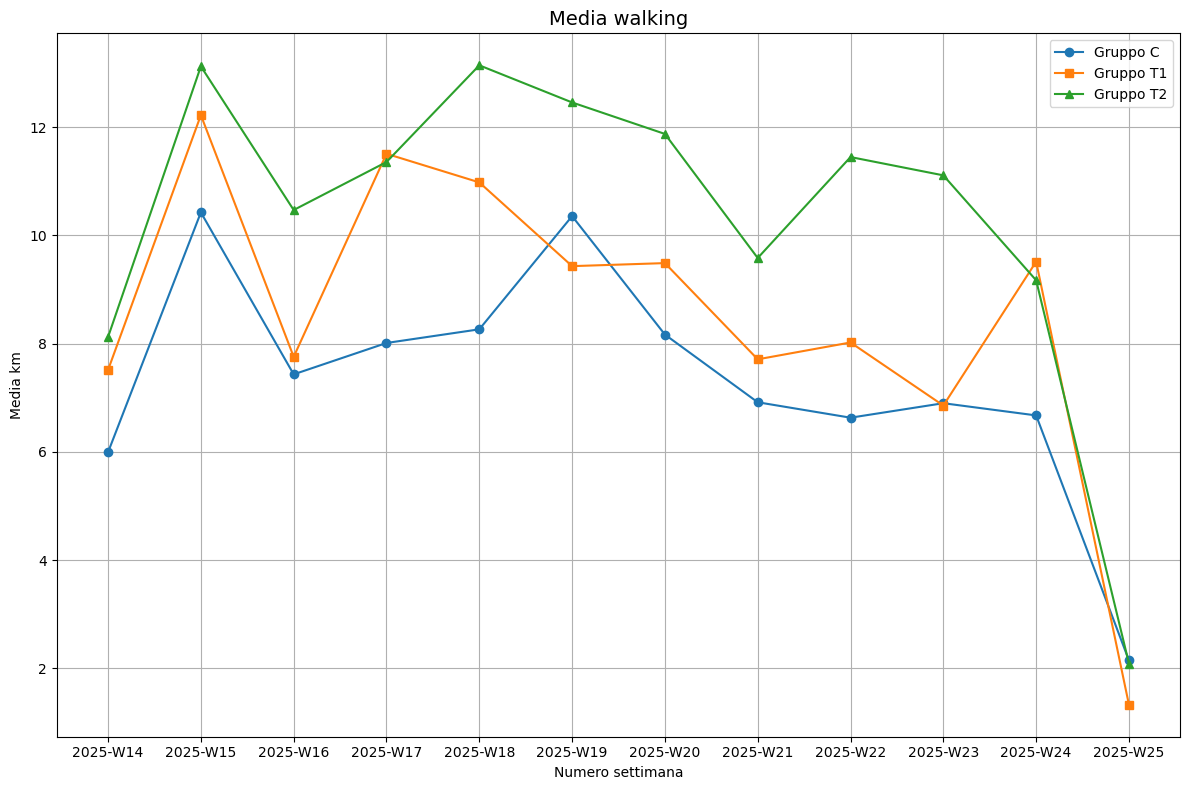

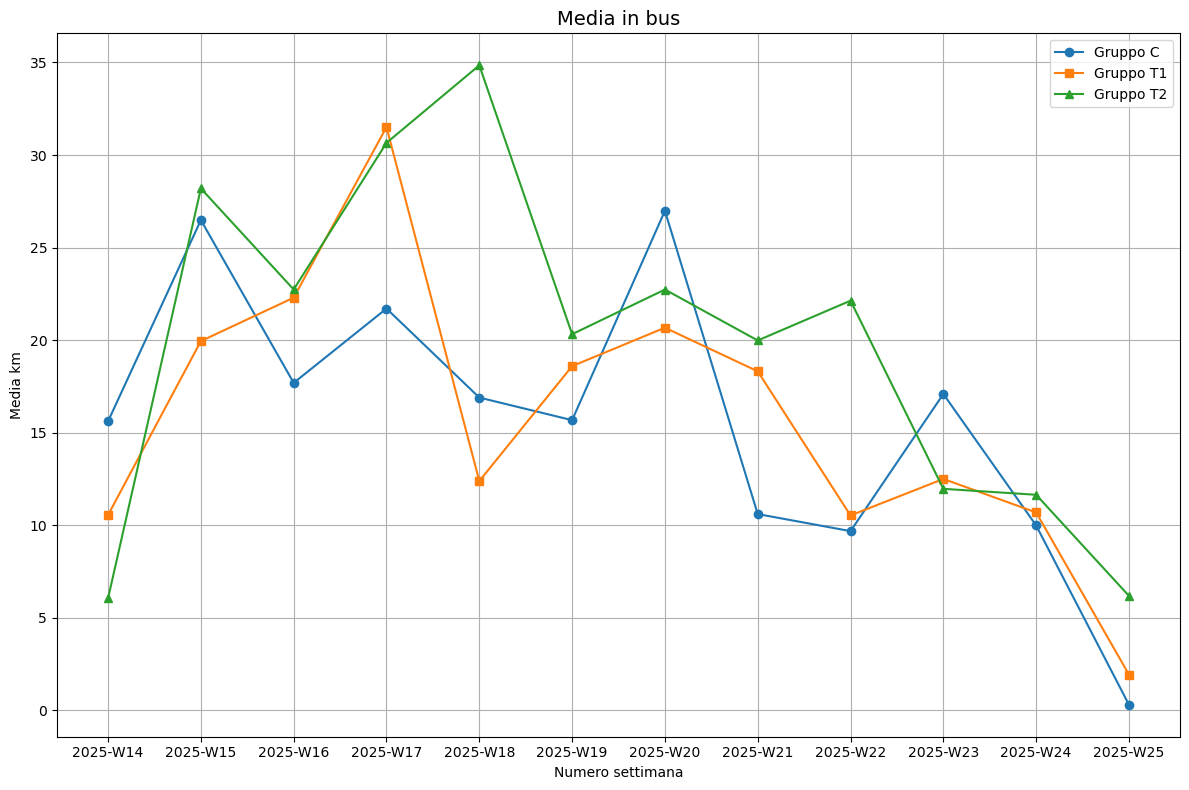

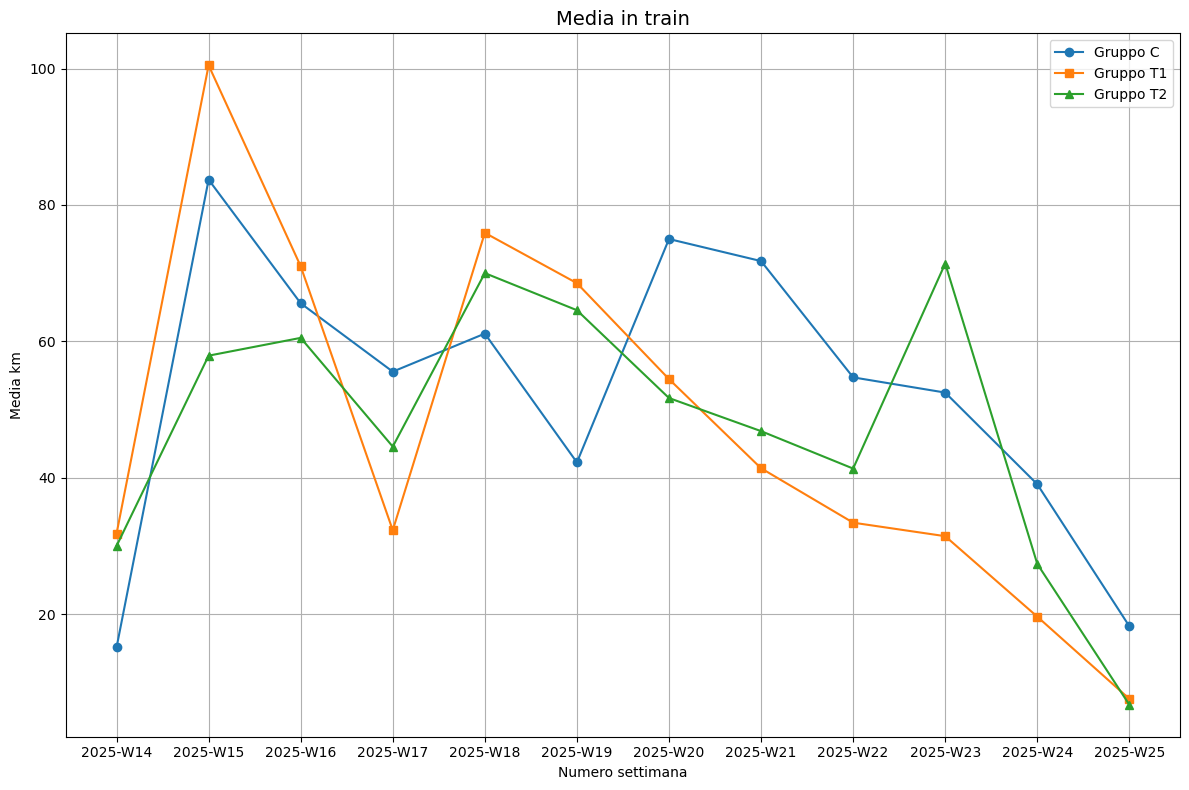

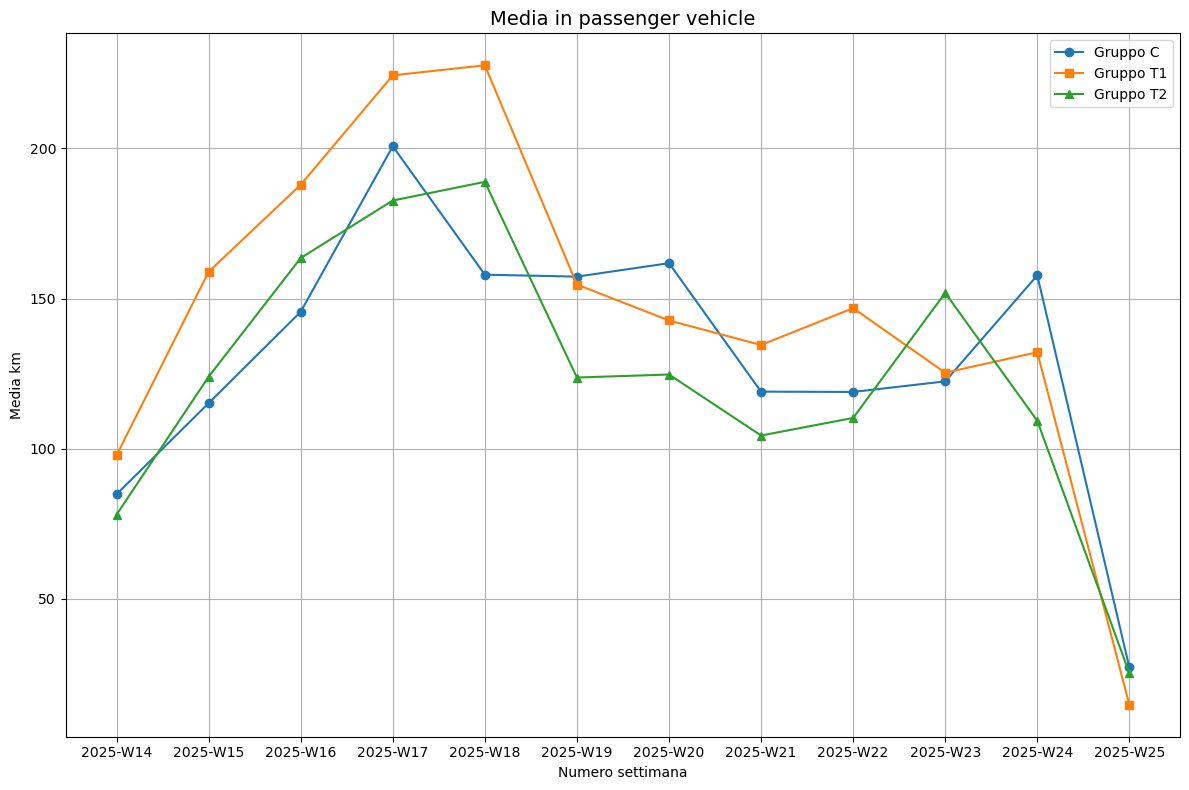

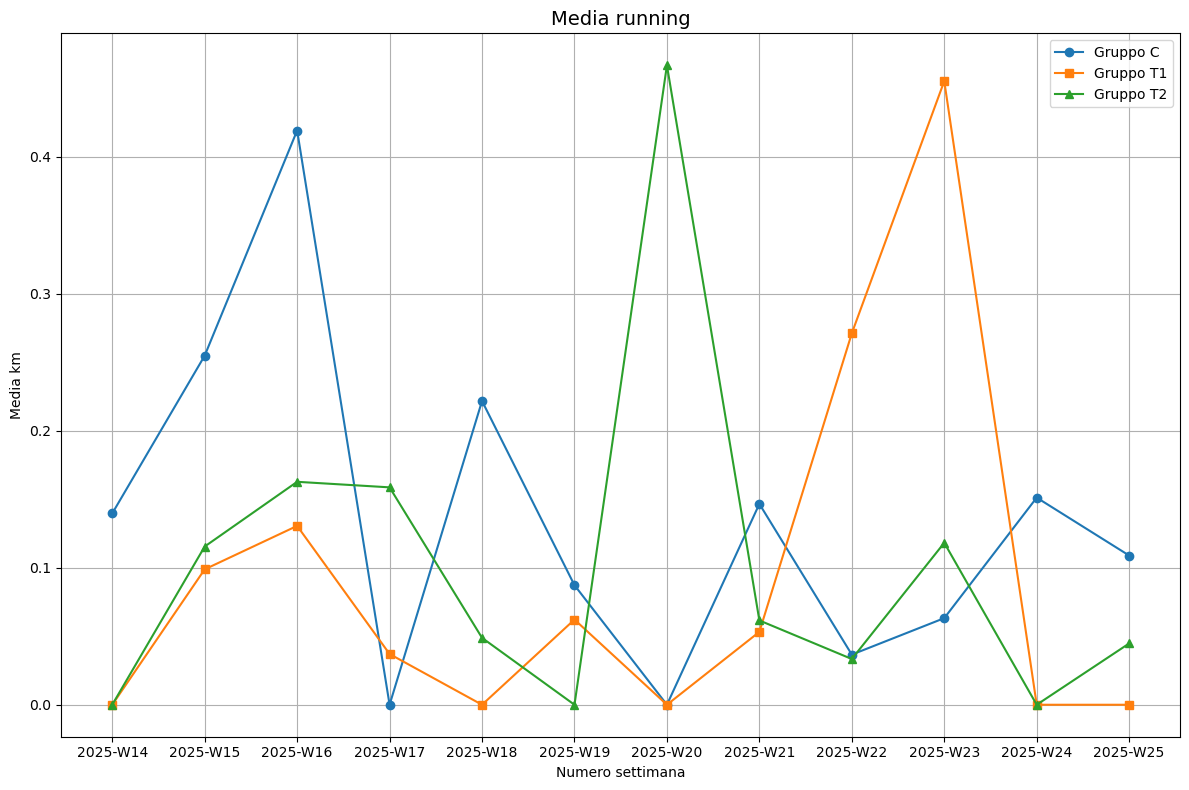

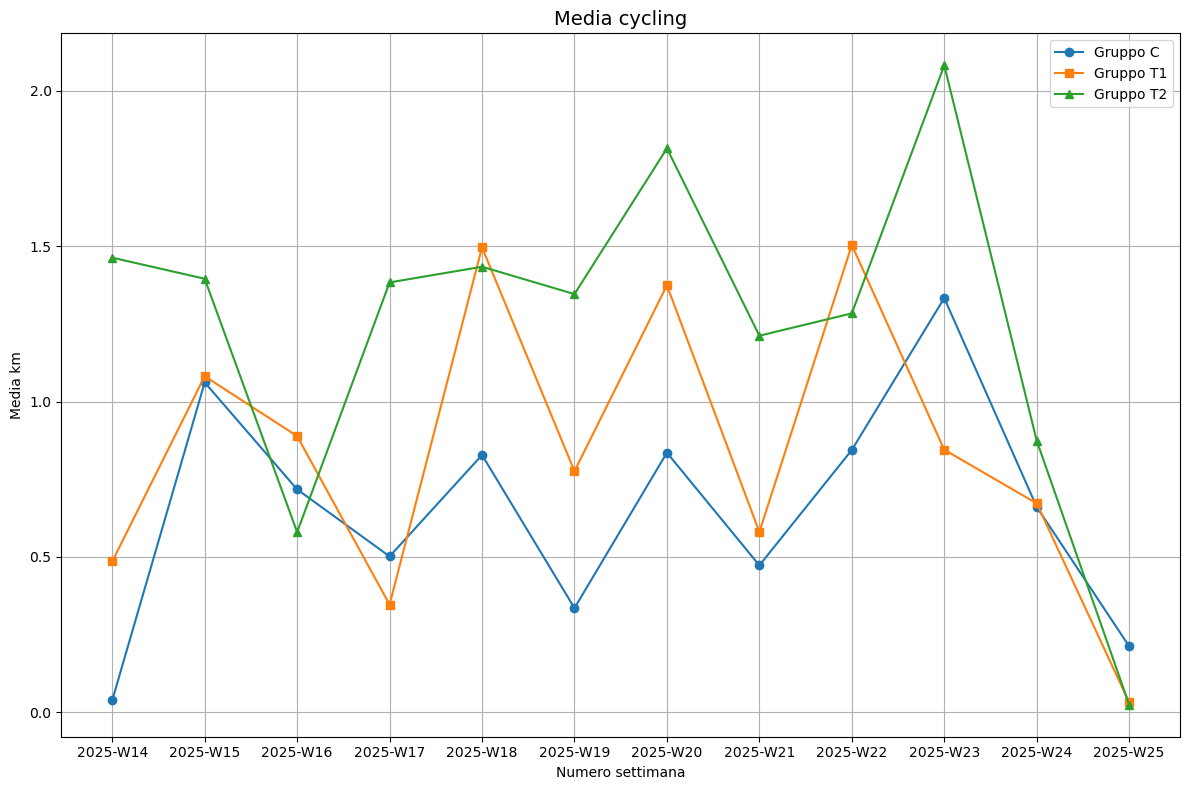

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista delle colonne di movimento
movement_columns = ['walking', 'in bus', 'in train', 'in passenger vehicle', 'running', 'cycling']

# Calcola le medie settimanali per ogni gruppo
groupC_means = groupC_df.groupby('week_number')[movement_columns].mean()
groupT1_means = groupT1_df.groupby('week_number')[movement_columns].mean()
groupT2_means = groupT2_df.groupby('week_number')[movement_columns].mean()

# Crea un grafico separato per ogni tipo di movimento
for column in movement_columns:
    plt.figure(figsize=(12, 8))

    # Plotta le linee per ogni gruppo
    plt.plot(groupC_means.index, groupC_means[column], label='Gruppo C', marker='o')
    plt.plot(groupT1_means.index, groupT1_means[column], label='Gruppo T1', marker='s')
    plt.plot(groupT2_means.index, groupT2_means[column], label='Gruppo T2', marker='^')

    plt.title(f'Media {column}', fontsize=14)
    plt.xlabel('Numero settimana')
    plt.ylabel('Media km')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


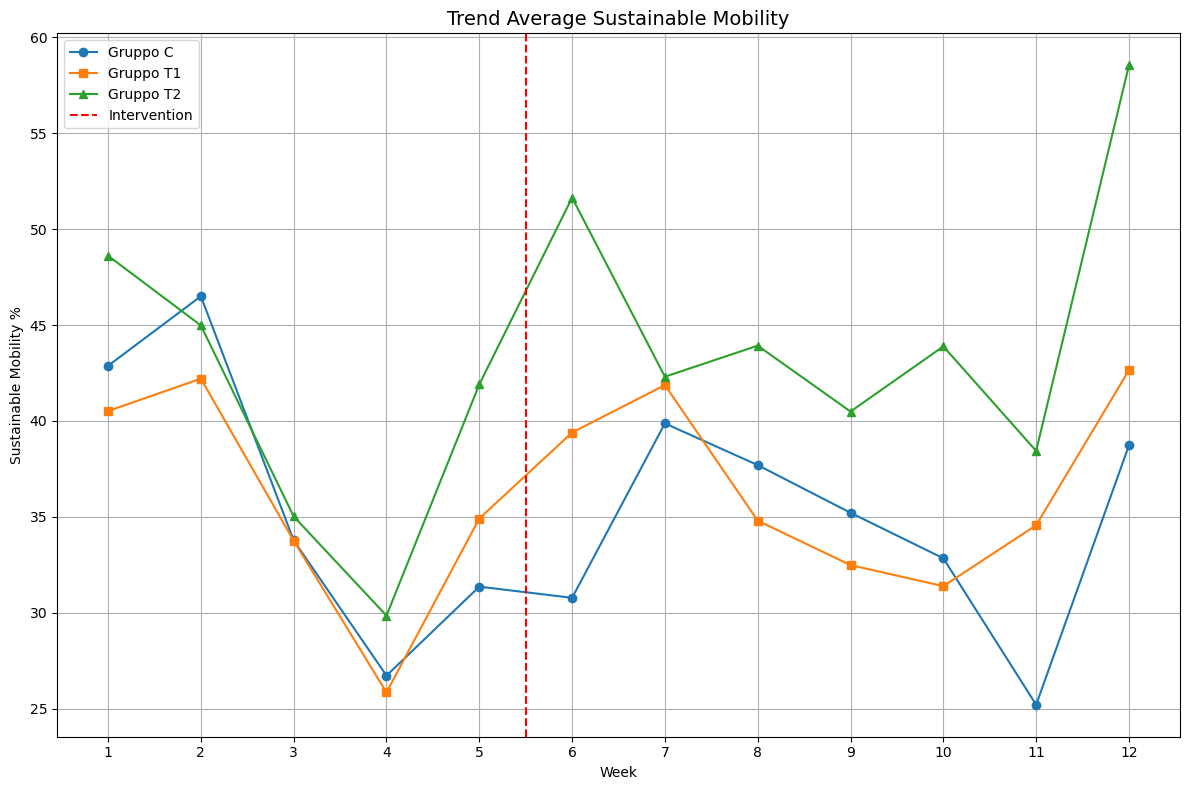

In [27]:
# Calcola le medie della mobilità sostenibile per ogni gruppo
groupC_sustainable = groupC_df.groupby('week_number')['percent_sustainable'].mean()
groupT1_sustainable = groupT1_df.groupby('week_number')['percent_sustainable'].mean()
groupT2_sustainable = groupT2_df.groupby('week_number')['percent_sustainable'].mean()

plt.figure(figsize=(12, 8))

# Plotta le linee per ogni gruppo
plt.plot(range(1, len(groupC_sustainable) + 1), groupC_sustainable, label='Gruppo C', marker='o')
plt.plot(range(1, len(groupT1_sustainable) + 1), groupT1_sustainable, label='Gruppo T1', marker='s')
plt.plot(range(1, len(groupT2_sustainable) + 1), groupT2_sustainable, label='Gruppo T2', marker='^')

# Aggiunge una linea orizzontale tra la settimana 5 e 6
plt.axvline(x=5.5, color='r', linestyle='--', label='Intervention')

plt.title('Trend Average Sustainable Mobility', fontsize=14)
plt.xlabel('Week')
plt.ylabel('Sustainable Mobility %')
plt.xticks(range(1, len(groupC_sustainable) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
